In [1]:
import numpy as np
import cv2
import json
import matplotlib.path as mpltPath
import os
import warnings
import tifffile
from skimage import exposure
import xml.etree.ElementTree as ET
import pandas as pd
from PIL import Image
from math import sqrt
import matplotlib.pyplot as plt
from glob import glob
from copy import copy
from tqdm.notebook import tqdm

(<Axes: title={'center': 'dst_Image'}>,
 Text(0.5, 1.0, 'dst_Image'))

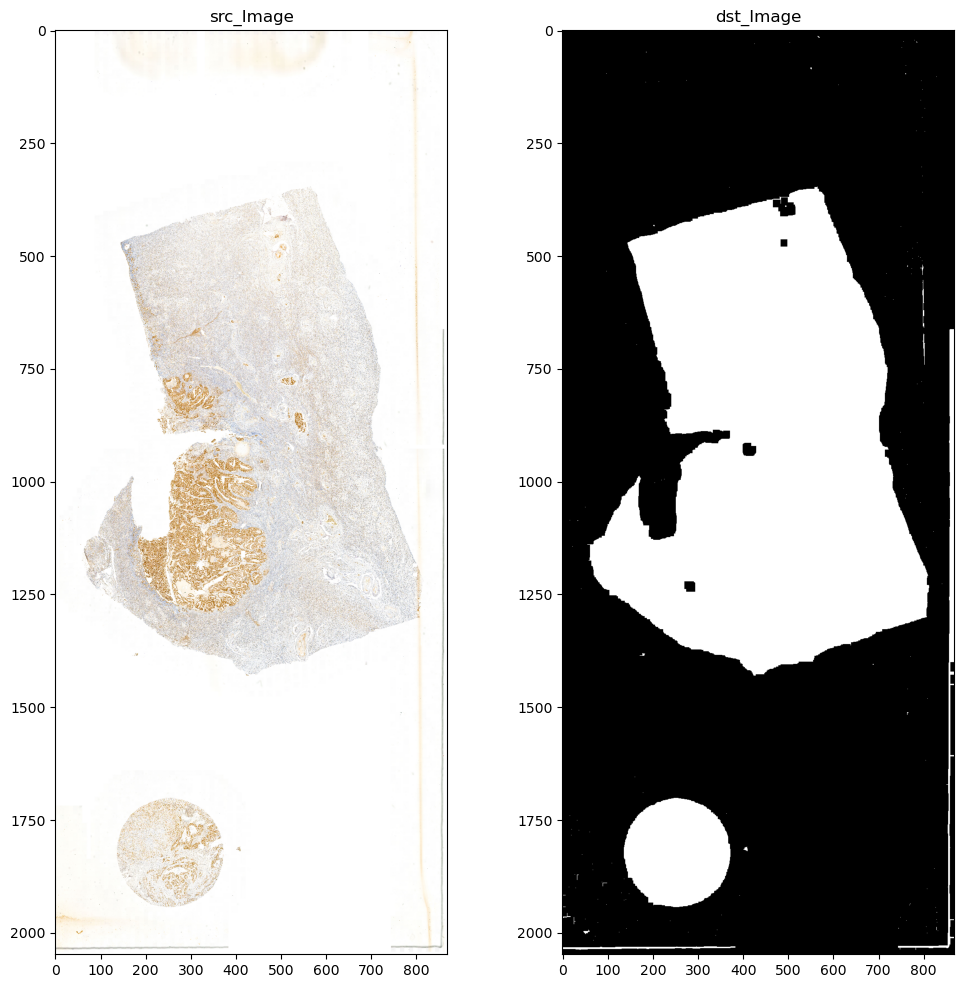

In [28]:
img =np.array(Image.open('../../data/virtual_stain/image_surf/thumb/MSH2/S21-25244-3.tiff'))
dst_img=copy(img)
def preprocessing(img):
    dst_img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)[:,:,2]
    ret, dst_img = cv2.threshold(dst_img, 127, 255, cv2.THRESH_OTSU)
    dst_img=255-dst_img
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
    dst_img = cv2.morphologyEx(dst_img, cv2.MORPH_CLOSE, k)
    return dst_img
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1), plt.imshow(img), plt.title('src_Image')
plt.subplot(1, 2, 2), plt.imshow(dst_img,cmap='gray'), plt.title('dst_Image')


In [10]:
dst_img.shape

(2048, 868)